<a href="https://colab.research.google.com/github/pragatirajput07/mll/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [38]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [39]:
!pip install kaggle

In [40]:
kaggle_credentails = json.load(open("kaggle.json"))

In [41]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [42]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [43]:
!ls

 class_indices.json   plant_disease_prediction_model.h5   sample_data
 drive		     'plantvillage dataset'		  test_apple_black_rot.jpeg
 kaggle.json	      plantvillage-dataset.zip


In [44]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [45]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'segmented', 'color']
38
['Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Tomato___Target_Spot', 'Potato___Early_blight', 'Corn_(maize)___Common_rust_']
38
['Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Tomato___Target_Spot', 'Potato___Early_blight', 'Corn_(maize)___Common_rust_']
38
['Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Tomato___Target_Spot', 'Potato___Early_blight', 'Corn_(maize)___Common_rust_']


In [46]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['a523dc0c-8d71-4bd4-b1c5-13f1b594c882___Mt.N.V_HL 8922.JPG', 'b2e93b6f-8a63-43f7-9305-dbad31dceda6___Mt.N.V_HL 9064.JPG', '452823c1-22d2-4bce-a4cc-8ad014421261___Mt.N.V_HL 6199.JPG', '3c593da4-e1df-460c-98a9-2bc71df670d5___Mt.N.V_HL 8970.JPG', '51053194-cb64-4594-8639-4657a7a7666f___Mt.N.V_HL 6179.JPG']


In [47]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


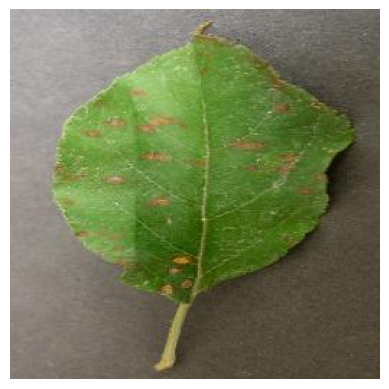

In [48]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [49]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [50]:
img_size = 224
batch_size = 32

In [51]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [52]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [53]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 10849 images belonging to 38 classes.


In [54]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 127s 92ms/step - accuracy: 0.6065 - loss: 1.6182 - val_accuracy: 0.8723 - val_loss: 0.4064
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 100s 74ms/step - accuracy: 0.9173 - loss: 0.2579 - val_accuracy: 0.8704 - val_loss: 0.4115
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 94s 69ms/step - accuracy: 0.9674 - loss: 0.1047 - val_accuracy: 0.8752 - val_loss: 0.4848
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 105ms/step - accuracy: 0.9811 - loss: 0.0679 - val_accuracy: 0.8893 - val_loss: 0.4524
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 104ms/step - accuracy: 0.9850 - loss: 0.0468 - val_accuracy: 0.8986 - val_loss: 0.4716


In [58]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.8982 - loss: 0.4655
Validation Accuracy: 89.87%


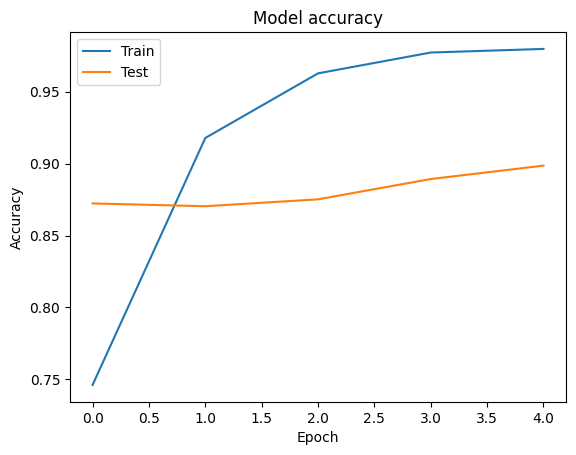

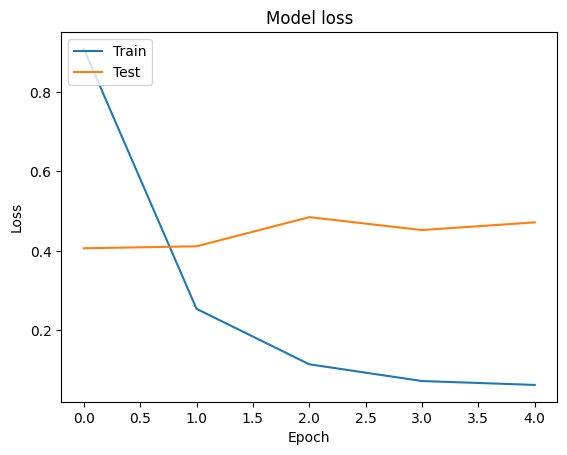

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [60]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [61]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [62]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [63]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [64]:
image_path = '/content/test_apple_black_rot.jpeg'

predicted_class_name = predict_image_class(model, image_path, class_indices)
print("Predicted Class Name:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Predicted Class Name: Tomato___Septoria_leaf_spot


In [65]:
import torch


In [66]:
model.save('drive/MyDrive/trained_models/plant_disease_prediction_model.h5')


In [67]:
model.save('plant_disease_prediction_model.h5')

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
!pip install flask-ngrok
!pip install pyngrok

In [70]:
from pyngrok import ngrok

# Replace 'your_ngrok_auth_token' with your actual Ngrok token
ngrok.set_auth_token("2sdMP7G5JIXz9LBqEZXjqkce8lA_5JzdHpQhrexdMZeKwp41i")

In [74]:
from flask import Flask, render_template_string
from pyngrok import ngrok

# Replace 'your_ngrok_auth_token' with your actual Ngrok token
ngrok.set_auth_token("2sdMP7G5JIXz9LBqEZXjqkce8lA_5JzdHpQhrexdMZeKwp41i")

app = Flask(__name__)

@app.route('/')
def home():
    return render_template_string('''
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Flask App on Colab</title>
        </head>
        <body>
            <h1>Hello, World!</h1>
            <p>This is a Flask app running on Google Colab with Ngrok.</p>
        </body>
        </html>
    ''')

# Start Ngrok and expose the Flask app
public_url = ngrok.connect(5000).public_url
print(f" * Ngrok tunnel: {public_url}")

if __name__ == '__main__':
    app.run()

 * Ngrok tunnel: https://9fd2-34-34-3-188.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [05/Feb/2025 19:13:44] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Feb/2025 19:13:45] "GET /favicon.ico HTTP/1.1" 404 -


In [72]:
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-33:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           

In [75]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/trained_models/plant_disease_prediction_model.h5")


In [ ]:
from flask import Flask, render_template, request
from pyngrok import ngrok
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import io

# Initialize Flask App
app = Flask(__name__)

# Load trained model
model = load_model("/content/drive/MyDrive/trained_models/plant_disease_prediction_model.h5")  # Update with your actual model path

# Ngrok Authentication
ngrok.set_auth_token("2sdMP7G5JIXz9LBqEZXjqkce8lA_5JzdHpQhrexdMZeKwp41i")

# Expose Flask App with Ngrok
public_url = ngrok.connect(5000).public_url
print(f" * Ngrok tunnel: {public_url}")

# Define allowed image extensions
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}

# Function to check if file is an allowed image type
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

# Function to preprocess image for prediction
def preprocess_image(image):
    image = image.resize((224, 224))  # Resize to match model input size
    image = np.array(image) / 255.0   # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define Home Route with Upload Form
@app.route("/", methods=["GET", "POST"])
def home():
    if request.method == "POST":
        if "file" not in request.files:
            return "No file part"

        file = request.files["file"]
        if file.filename == "":
            return "No selected file"

        if file and allowed_file(file.filename):
            image = Image.open(io.BytesIO(file.read()))
            image = preprocess_image(image)

            # Make Prediction
            prediction = model.predict(image)
            result = "Disease Detected" if prediction[0][0] > 0.5 else "Healthy Plant"

            return f"<h1>Result: {result}</h1>"

    return '''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Plant Disease Detection</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">
        <style>
            body {
                font-family: Arial, sans-serif;
                background-color: #f4f4f4;
                margin: 0;
                padding: 0;
                display: flex;
                justify-content: center;
                align-items: center;
                height: 100vh;
            }
            .container {
                width: 100%;
                max-width: 600px;
                background-color: white;
                padding: 20px;
                border-radius: 8px;
                box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
                text-align: center;
            }
            h1 {
                font-size: 2em;
                color: #333;
            }
            h2 {
                font-size: 1.5em;
                color: #555;
            }
            p {
                font-size: 1em;
                color: #666;
            }
            input[type="file"] {
                margin: 20px 0;
            }
            button {
                padding: 10px 20px;
                font-size: 1em;
                background-color: #4CAF50;
                color: white;
                border: none;
                border-radius: 5px;
                cursor: pointer;
                transition: background-color 0.3s;
            }
            button:hover {
                background-color: #45a049;
            }
            .result {
                font-size: 1.5em;
                color: #00796b;
                font-weight: bold;
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Plant Disease Detection</h1>
            <h2>Upload an image of a plant leaf to detect disease.</h2>
            <form action="/" method="POST" enctype="multipart/form-data">
                <input type="file" name="file" accept="image/*" required>
                <br>
                <button type="submit">Upload & Detect</button>
            </form>
            {% if result %}
            <p class="result">{{ result }}</p>
            {% endif %}
        </div>
    </body>
    </html>
    '''

# Run Flask App
if __name__ == "__main__":
    app.run()


 * Ngrok tunnel: https://86fe-34-34-3-188.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [05/Feb/2025 19:33:35] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Feb/2025 19:33:36] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


INFO:werkzeug:127.0.0.1 - - [05/Feb/2025 19:33:46] "POST / HTTP/1.1" 200 -
